# TP : Reconnaissance optique de chiffres

Ce TP sur Capytale : [https://capytale2.ac-paris.fr/web/c/946e-3650247](https://capytale2.ac-paris.fr/web/c/946e-3650247)

## <span style="color: orangered;">1. Chargement et visualisation des jeux de données</span>

La **librairie python scikit-learn** contient de nombreux algorithmes d'intelligence artificielle, ainsi que des bases de données d'exemples classiques.

En particulier, le jeu de données **digits** contient un ensemble de 1797 chiffres de 0 à 9 manuscrits, sous la forme d'images de 8 X 8 pixels

In [2]:
from sklearn.datasets import load_digits

Enregistrons le dataset dans une variable digits.

Nous avons bien 1797 éléments


In [3]:
digits = load_digits()
print(digits.keys()) # affichage des clés du dataset
print(len(digits.data)) # affichage du nombre d'images

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
1797


Chaque images est une liste de 8 X 8 pixels soit 64 valeurs comprises entre 0 et 16 (niveaux de gris).

In [4]:
# Une liste de liste servant à l'affichage d'une image
print(digits.images[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


### Visualisons une image


Le code ci-dessous permet de visualiser quatre images associées dans la base au chiffre 3.

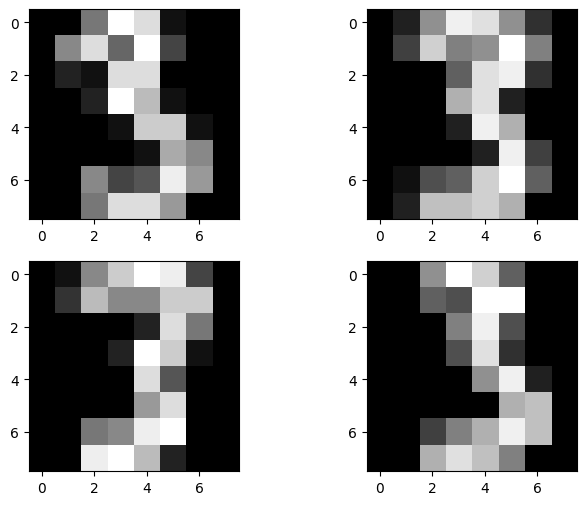

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

axs[0, 0].imshow(digits.images[3], cmap='gray')
axs[0, 1].imshow(digits.images[13], cmap='gray')
axs[1, 0].imshow(digits.images[23], cmap='gray')
axs[1, 1].imshow(digits.images[45], cmap='gray')

plt.show()

### Découpons le jeu de données 'digits' en deux partie : 

* [0-1700] pour les valeurs dont la classe est connue (données d'entraînement).

* [1701-1797] pour les valeurs à tester (dont on veut prédire la classe).

Chaque ensemble de données est représentée sous la forme d'un tableau d'entiers correspondants aux indices des images dans la base ``digits``.

In [ ]:
images_connues = [i for i in range(1700)]
images_inconnues = [i for i in range(1700, 1798)]

## <span style="color: orangered;">2. Mise en oeuvre de l'algorithme des KNN</span>

### 2.1 La distance entre deux images

Pour calculer la distance entre deux images, nous allons utiliser la distance euclidienne. Compléter la fonction distEuclide ci-dessous :

- les paramètres de la fonction seront deux listes de même taille

**Rappel** : distance euclidienne

$$d(x,y) = \sqrt{\sum_{i=0}^{n} (yi - xi)^2}$$



In [ ]:
from math import sqrt

def distEuclide(elt1:list, elt2:list)->float:
    """
    Renvoie la distance entre deux listes
    """
    distance = 0
    for i in range(...):
        distance += ...
    distance = ...
    return distance

### 2.2 Liste des distances

Compléter ci-dessous la fonction ``calculeDistances`` prend en argument une liste `image_inconnue`, de taille 8x8, et qui retourne la liste des distances euclidiennes entre l'image inconnue et toutes les autres connues (on utilisera la variable globale `images_connues` définie plus haut). ``distances`` est une liste de dictionnaires de la forme : 

```
[{'image_connue': 1, 'distance': 12.0}, {'image_connue': 2, 'distance': 15.0}, ...]
```

In [ ]:
def calculeDistances(image_inconnue:list) ->list:
    """
    Calcule les distances entre l'image inconnue et toutes les autres connues
    """
    distances = []
    for i in range(len(images_connues)):
        distance = distEuclide(..., digits.data[images_connues[i]])
        distances.append({"image": ..., "distance": ...})
    return distances

### 2.3 Liste des $k$ plus proches voisins.

Considérons un entier $k>3$. Compléter la fonction ci-dessous qui retourne la liste de $k$ plus proches voisins de l'image représentée par `image_inconnue`.

In [ ]:
def cleDeTri(dico:dict)->float:
    """
    Retourne la distance de l'élément du dictionnaire
    """
    return dico["distance"]

def plusProchesVoisins(image_inconnue:list, k: int) ->list:
    """
    Retourne le tableau des k plus proches voisins

    image_inconnue : liste de 8x8 pixels de l'image inconnue

    retourne : liste de dictionnaires des k plus proches voisins 
    """
    # on calcule les distances entre l'image inconnue et les images connues
    distances = ...
    # on trie les distances par ordre croissant
    distances_triees = ...
    # on retourne la liste des k plus proches voisins
    voisins = ...
    return voisins

### 2.4 Prédiction de la classe de l'image inconnue

Compléter la fonction ci-dessous qui retourne la classe la plus fréquente parmi les $k$ plus proches voisins.

In [ ]:
def prediction(image_inconnue:list, k:int) ->int:
    """
    Prédit le chiffre associé à l'image inconnue
    """
    # On récupère les k plus proches voisins
    voisins = ...
    # On récupère les chiffres des voisins
    chiffres_voisins = []
    for voisin in voisins:
        chiffres_voisins.append(digits.target[voisin["image"]])
    # On détermine le chiffre le plus fréquent parmi les chiffres des voisins
    prediction = max(set(chiffres_voisins), key=chiffres_voisins.count)
    return ...

Testons cette fonction avec la première image inconnue qui a pour indice ``images_inconnues[0]`` dans la base ``digits`` (soit 1700).

In [ ]:
# image inconnue d'indice 1700 dans la base
print("Tableau de l'image inconnue : ", digits.images[images_inconnues[0]])
# on applique l'algorithme KNN avec 7 voisins
chiffrePredit = prediction(digits.data[images_inconnues[0]], 7)
print("Je prédis que l'image est un : ", chiffrePredit)
print("L'image est en réalité un : ", digits.target[images_inconnues[0]])
if chiffrePredit == digits.target[images_inconnues[0]]:
    print("La prédiction est correcte : je suis un très bon algorithme !")

# représentation graphique de l'image testée
plt.gray()
plt.matshow(digits.images[images_inconnues[0]])
plt.show()

Vous pouvez modifier le code précédent pour tester d'autres images en remplaçant l'indice `0` par un autre indice inférieur à 97. Vous pouvez aussi tester l'algorithme avec d'autres valeurs de k.

## <span style="color: orangered;">3. Testez maintenant votre écriture</span>

### 3.1 Une feuille à carreaux et un crayon !

1. Sur une feuille à carreaux, dessinez un cadre de 8 X 8

2. Ecrivez le chiffre de votre choix

3. Manuellement, indiquez les niveaux de couleurs pour chaques cases

**Comment indiquer un niveau ?**

* Si votre trait de stylo ne se trouve pas dans une case -> valeur = 0
* Si votre trait se trouve entièrement (au centre de) dans la case -> valeur = 16
* Si votre trait se trouve un peu (+/-) dans la case -> 0 < valeur < 16

**Un exemple :**

<img src="https://capytale2.ac-paris.fr/web/sites/default/files/2022/03-11/17-51-56/Capture3Manu.JPG" width="200px" style="float:center"  />

In [ ]:
k = 7

# Remplacez cette liste par la votre !
inconnue = [0., 0., 0., 0., 3., 3., 0., 0., \
            0., 0.,16.,15.,14.,11., 0., 0., \
            0., 0., 0., 0.,16., 7., 0., 0., \
            0., 0., 5.,16.,16., 8., 0., 0., \
            0., 0., 0., 0.,16., 5., 0., 0., \
            0., 0., 0., 0., 0.,16., 0., 0., \
            0., 0.,16.,16.,16.,16., 8., 0., \
            0., 0., 0., 0., 0., 0., 0., 0.]


### 3.2 comparez votre chiffre manuscrit à l'image créee.

Est ce que cela ressemble ?

In [ ]:
# Tracé de l'image manuscrite numérisée
monChiffre = [inconnue[i:i + 8] for i in range(0, len(inconnue), 8)]
print(inconnue)
plt.gray()
plt.matshow(monChiffre)
plt.show()

Vous pouvez maintenant faire reconnaître votre chiffre par l'algorithme KNN :

In [ ]:
#Exécutez ce programme pour lancer la reconnaissance

if len(inconnue) != 8*8 :
    print(f"Dimensions incorrectes de l'image ! votre image doit faire 8x8 et elle fait {len(inconnue)} pixels !")

else:
    # on applique l'algorithme KNN avec 7 voisins
        chiffrePredit = prediction(inconnue, 7)
print("Je prédis que l'image est un : ", chiffrePredit)